## K-Means

# Import library

In [6]:
import pandas as pd
import numpy as np

# Load your data

In [10]:
# Answer
df3 = pd.read_csv('Sheet1-Table 1.csv',delimiter=';')
df3


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Unnamed: 34
0,Smith,288389,Consulting,8790,1-Mar,Contacted,25,46,"0,8",35,...,Contacted,30.0,46.0,"0,9",35.0,2.0,Neutral,Average,Email,NaN
1,Smith,287515,Consulting,9252,1-Mar,Demo,32,44,"0,9",55,...,Demo,40.0,42.0,"1,2",55.0,5.0,Positive,Very Good,Phone,NaN
2,Garcia,388664,Info and Culture,12723,2-Mar,Contacted,35,45,"1,5",50,...,Contacted,50.0,46.0,"1,4",69.0,7.0,Neutral,At Churn Risk,Email,NaN
3,Chen,281026,Consulting,9740,2-Mar,Contacted,35,30,"0,5",65,...,Demo,30.0,37.0,"1,5",50.0,4.0,Positive,Good,Email,NaN
4,Smith,354030,Ecommerce,13563,2-Mar,Proposal,47,42,"1,1",60,...,Negotiations,45.0,41.0,"1,3",42.0,4.0,Positive,Good,Phone,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Zhao,393365,Info and Culture,18870,29-Mar,Contacted,38,42,"1,2",45,...,Demo,42.0,38.0,"1,1",53.0,5.0,Positive,Good,Phone,NaN
131,Garcia,388480,Info and Culture,15911,29-Mar,Contacted,41,46,1,47,...,Contacted,38.0,42.0,"0,9",42.0,3.0,Neutral,Average,Phone,NaN
132,Devi,465745,Trades,15983,29-Mar,Contacted,45,37,"0,9",60,...,Proposal,45.0,39.0,"1,2",56.0,5.0,Positive,Good,Phone,NaN
133,Taylor,474051,Trades,16184,29-Mar,Contacted,30,45,"0,8",38,...,Contacted,33.0,45.0,1,40.0,3.0,Neutral,Average,Email,NaN


# Plot the scatter plot 

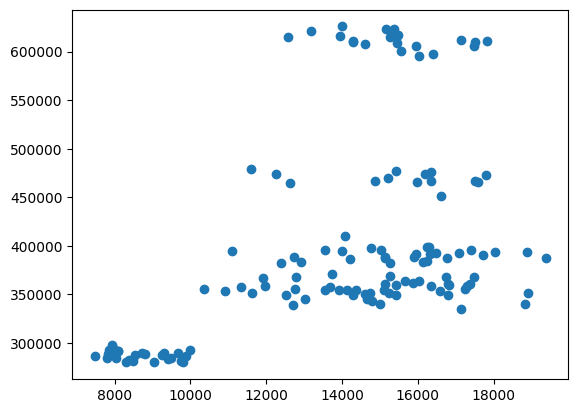

In [8]:
# (Q4 versus Q2)
# Answer
import matplotlib.pyplot as plt

plt.scatter(df3["Q4"],df3["Q2"])

# Kmean 

Step1: For using Kmean method first import the required library: from sklearn.cluster import KMeans

In [9]:
# Answer
from sklearn.cluster import KMeans


Step 2: Convert the required column to the numpy array (Hint: X= np.array(name_of_table[['col1','col2']]))

In [32]:
# Q4 and Q2 col
x = np.array(df3[['Q4', 'Q2']])


Step 3: Introduce the model:

kmeans = KMeans(n_clusters = 'put one number', n_init = 12)

n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [33]:
# Answer

kmeans = KMeans(n_clusters=3, n_init=30)


Step 4: Apply the model

clust = kmeans.fit(x)

In [34]:
# Answer
clust = kmeans.fit(x)

Step 5: print your cluster

cl = kmeans.labels_


In [35]:
# Answer
cl = kmeans.labels_
cl

array([0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

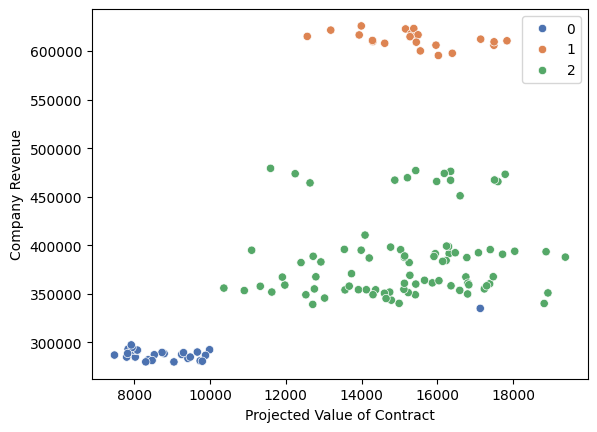

In [36]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

# Elbow Method

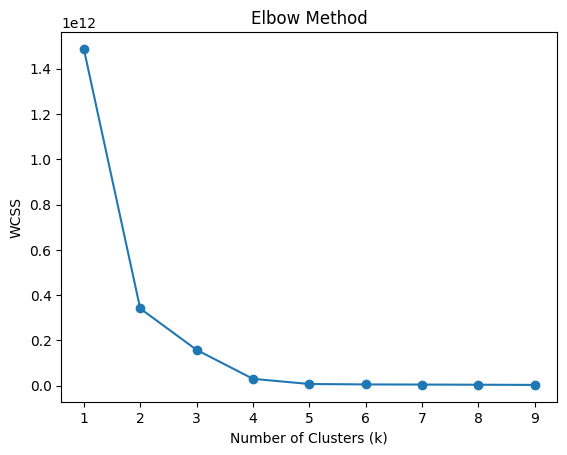

In [37]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

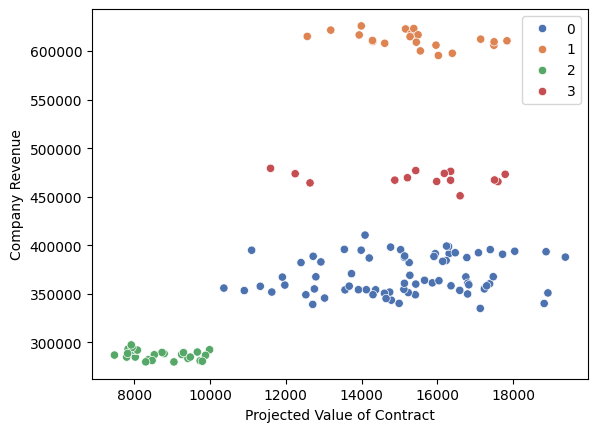

In [38]:
# Repeat the step above with the correct number of the cluster

kmeans = KMeans(n_clusters=4)
clust = kmeans.fit(x)
cl = kmeans.labels_

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

Project: Customer Segmentation

In this project, your goal is to segment customers into distinct groups based on their characteristics. You are provided with a dataset containing the following features:

CustomerID – A unique identifier for each customer

Gender – The customer's gender

Age – The customer's age

Annual Income – The customer's annual income (in thousands)

Spending Score – A score assigned based on customer behavior and spending habits

Your task is to apply various clustering algorithms to identify meaningful customer segments. For now try K-Means approach.

This dataset is available on Kaggle, and you're encouraged to experiment and iterate as much as possible.

Have fun exploring the data—and remember, your insights can help businesses tailor their strategies to better serve different types of customers!

In [41]:
# Your codes go here
data = pd.read_csv('1632560262896716.csv')
data.head()

x = data['Age']
y = data['Spending Score (1-100)']


fig = plt.figure(projection='3d')
ax = plt.scatter(x=da


SyntaxError: incomplete input (1651745204.py, line 9)

# Recomended point:

Normalizing over the standard deviation

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. In other words, the comparison between two things will be more meaningful. We use StandardScaler() to normalize our dataset.

In [ ]:
# Step 3: Scale the features (optional but recommended)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

I used below ref for the first example:
Source: https://github.com/DrStephPowers/BIA/blob/main/Ch9_Cluster.ipynb                